# Group Project - Supervised Learning Application

# Lending Club Financial Data Case Study



### Data Description

**Loan Details**

*   **loan_amnt**: amount of the loan
*   **term**: term of the loan
*   **int_rate**: interest rate of the loan
*   **installment**: monthly payment of the loan
*   **purpose**: purpose of the loan
*   **dti**:debt-to-income
*   **delinq_2yrs**: number of delinquencies in the past 2 years
*   **inq_last_6mths**: number of inquiries in the last 6 months
*   **open_acc**: number of open credit lines in the borrower's credit file
*   **pub_rec**:number of derogatory public records
*   **revol_bal**:  total credit revolving balance
*   **revol_util**:  amount of credit the borrower is using relative to their total credit limit
*   **total_acc**: total number of credit lines in the borrower's credit file
*   **last_pymnt_amnt**: last payment amount received

**Borrower Details**
*   **grade**: the grade assigned by the lending institution based on the creditworthiness of the borrower
*    **sub_grade**: more detailed grade based on the borrower's creditworthiness
*   **emp_length**: length of employment of the borrower
*   **home_ownership**:  type of home ownership of the borrower
*   **annual_inc**: annual income of the borrower
*   **verification_status**: whether the income was verified by lending institution
























### **Data Loading**

In [727]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import warnings

df_complete = pd.read_csv('accepted_2007_to_2018Q4.gz', compression='gzip',low_memory=False)
df = df_complete.sample(frac=0.01, random_state=42)

#### Setting notebook parameters

In [728]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', '{:.f}'.format)
warnings.filterwarnings("ignore", category=FutureWarning)
np.random.seed(42)
%matplotlib inline
sns.set_style('darkgrid')
sns.set(color_codes=True)
# np.set_printoptions(precision=4)

#### Data frame shape

In [729]:
df.shape

(22607, 151)

#### Data frame head

In [730]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
392949,39651438,NaN,32000.00,32000.00,32000.00,60 months,10.49,687.65,B,B3,Public Service,10+ years,MORTGAGE,120000.00,Verified,Feb-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,919xx,CA,24.05,0.00,Oct-1981,735.00,739.00,0.00,NaN,NaN,20.00,0.00,39687.00,57.80,42.00,w,7181.91,7181.91,33676.20,33676.20,24818.09,8858.11,0.00,0.00,0.00,Mar-2019,687.65,Apr-2019,Mar-2019,794.00,790.00,0.00,NaN,1.00,Individual,NaN,NaN,NaN,0.00,0.00,457317.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82400.00,NaN,NaN,NaN,6.00,26901.00,31079.00,71.20,0.00,0.00,154.00,165.00,1.00,1.00,2.00,9.00,NaN,7.00,NaN,0.00,6.00,11.00,8.00,20.00,7.00,14.00,31.00,11.00,20.00,0.00,0.00,0.00,4.00,100.00,28.60,0.00,0.00,556496.00,103647.00,64100.00,72197.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1273506,16411620,NaN,9600.00,9600.00,9600.00,36 months,12.99,323.42,C,C1,NaN,NaN,RENT,21900.00,Verified,May-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,331xx,FL,10.03,0.00,Apr-2001,685.00,689.00,1.00,NaN,118.00,13.00,1.00,4509.00,38.90,20.00,w,0.00,0.00,11643.97,11643.97,9600.00,2043.97,0.00,0.00,0.00,Jun-2017,0.85,NaN,Aug-2017,544.00,540.00,0.00,NaN,1.00,Individual,NaN,NaN,NaN,0.00,0.00,4509.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11600.00,NaN,NaN,NaN,6.00,347.00,871.00,63.70,0.00,0.00,97.00,157.00,1.00,1.00,0.00,26.00,NaN,1.00,NaN,0.00,2.00,5.00,2.00,5.00,2.00,13.00,

### **Data Understanding**

### **Understanding each feature**

The dataset has 142 columns so it important to understand the description of each feature before we explore them. After analysing, the features below were excluded as they have a potential of causing a data leakage and also being irrevant such as unique values.

#### **Features Causing Data Leakage**

The following features have been excluded due to their potential to cause data leakage in the prediction of loan defaults:

| Feature Name                   | Reason for Removal                                                                                                          | Type of Issue |
|--------------------------------|-----------------------------------------------------------------------------------------------------------------------------|---------------|
| `total_pymnt`                  | Derived from loan status (payment status)                                                                                   | Data Leakage  |
| `total_rec_int`                | Derived from loan status (interest earned)                                                                                  | Data Leakage  |
| `total_rec_prncp`              | Derived from loan status (principal repaid)                                                                                 | Data Leakage  |
| `last_pymnt_d`                 | Derived from loan status (last payment date)                                                                                | Data Leakage  |
| `last_pymnt_amnt`              | Derived from loan status (last payment amount)                                                                              | Data Leakage  |
| `hardship_last_payment_amount` | Related to loan status (hardship situation)                                                                                 | Data Leakage  |
| `hardship_loan_status`         | Directly relates to loan status                                                                                             | Data Leakage  |
| `hardship_status`              | Reflects the status of hardship related to loan                                                                             | Data Leakage  |
| `debt_settlement_flag`         | May indicate poor loan performance                                                                                          | Data Leakage  |
| `debt_settlement_flag_date`    | Related to debt management status                                                                                           | Data Leakage  |
| `settlement_status`            | Related to loan repayment status                                                                                            | Data Leakage  |
| `settlement_date`              | Related to loan repayment status                                                                                            | Data Leakage  |
| `settlement_amount`            | Related to loan repayment status                                                                                            | Data Leakage  |
| `settlement_percentage`        | Related to loan repayment status                                                                                            | Data Leakage  |
| `settlement_term`              | Related to loan repayment status                                                                                            | Data Leakage  |
| `hardship_amount`              | Related to loan repayment status                                                                                            | Data Leakage  |
| `hardship_start_date`          | Related to loan repayment status                                                                                            | Data Leakage  |
| `hardship_end_date`            | Related to loan repayment status                                                                                            | Data Leakage  |
| `hardship_length`              | Related to loan repayment status                                                                                            | Data Leakage  |
| `hardship_type`                | Related to loan repayment status                                                                                            | Data Leakage  |
| `num_accts_ever_120_pd`        | Indicates severe delinquency, impacts target                                                                                | Data Leakage  |
| `num_tl_120dpd_2m`             | Indicates severe delinquency, impacts target                                                                                | Data Leakage  |
| `chargeoff_within_12_mths`     | Directly relates to poor loan performance                                                                                   | Data Leakage  |
| `hardship_reason`              | Reflects situation potentially impacting loan status                                                                        | Data Leakage  |
| `delinq_amnt`                  | Reflects amount of delinquency                                                                                              | Data Leakage  |
| `mths_since_last_delinq`       | Indicates recency of delinquency                                                                                            | Data Leakage  |
| `collections_12_mths_ex_med`   | Reflects recent collections, impacts target                                                                                 | Data Leakage  |
| `num_tl_op_past_12m`           | Reflects number of open accounts, impacts target                                                                            | Data Leakage  |
| `pub_rec_bankruptcies`         | Indicates financial trouble                                                                                                 | Data Leakage  |
| `tax_liens`                    | Reflects financial obligations                                                                                              | Data Leakage  |
| `fico_range_low`               | Indicates credit score range                                                                                                | Data Leakage  |
| `fico_range_high`              | Indicates credit score range                                                                                                | Data Leakage  |
| `next_pymnt_d`                 | Reflects future payment intentions                                                                                          | Data Leakage  |
| `last_credit_pull_d`           | Reflects recent credit inquiries                                                                                            | Data Leakage  |
| `collections_12_mths_ex_med`   | Indicates recent collections without medical debts                                                                          | Data Leakage  |
| `mths_since_last_major_derog`  | Reflects recent derogatory events                                                                                           | Data Leakage  |
| `out_prncp`                    | Reflects outstanding principal, may indicate status                                                                         | Data Leakage  |
| `out_prncp_inv`                | Reflects outstanding investment, may indicate status                                                                        | Data Leakage  |
| `total_pymnt_inv`              | Reflects payments that indicate loan performance                                                                            | Data Leakage  |
| `total_rec_late_fee`           | Indicates if late fees were incurred                                                                                        | Data Leakage  |
| `recoveries`                   | Amount recovered post-default                                                                                               | Data Leakage  |
| `collection_recovery_fee`      | Fees incurred during collection efforts post-default                                                                        | Data Leakage  |
| `last_fico_range_high`         | Credit score at last pull, indicating risk                                                                                  | Data Leakage  |
| `last_fico_range_low`          | Credit score at last pull, indicating risk                                                                                  | Data Leakage  |
| `disbursement_method`          | Information about the disbursement method is only known after the loan is approved, leading to potential data leakage.      | Data Leakage  | 
| `issue_d`                      | The loan issue date is known after approval, introducing data leakage as it's not available at the time of application.     | Data Leakage  | 
| `pymnt_plan`                   | Indicates if the borrower is on a payment plan, often known after the loan starts showing trouble, which can cause leakage. | Data Leakage  | 
| `funded_amnt`                  | Represents the actual amount funded, set after loan approval, which can cause leakage.                                      | Data Leakage  |   
| `funded_amnt_inv`              | The investor's funded amount, known only after the loan is approved, potentially causing data leakage.                      | Data Leakage  |   
| `hardship_flag`                | Indicates if a borrower has received hardship assistance, often after loan distress, which can cause leakage.               | Data Leakage  |   

---


### **Irrelevant Features**

The following features have been excluded due to their irrelevance in predicting loan defaults, often being unique identifiers or unrelated to loan performance:

| Feature Name                | Reason for Removal                                        | Type of Issue |
|-----------------------------|-----------------------------------------------------------|---------------|
| `id`                        | Unique identifier, no predictive value (100% null values) | Irrelevance   |
| `member_id`                 | Unique identifier, no predictive value (100% null values) | Irrelevance   |
| `url`                       | Unrelated to prediction task                              | Irrelevance   |
| `desc`                      | Unrelated to prediction task                              | Irrelevance   |
| `title`                     | Unrelated to prediction task                              | Irrelevance   |
| `zip_code`                  | Too granular and unlikely to add value                    | Irrelevance   |
| `addr_state`                | May cause noise in predictions                            | Irrelevance   |
| `application_type`          | Could correlate with performance                          | Irrelevance   |
| `verification_status_joint` | Reflects financial behavior                               | Irrelevance   |
| `annual_inc_joint`          | May relate to financial stability                         | Irrelevance   |
| `dti_joint`                 | May reflect financial health                              | Irrelevance   |
| `sec_app_fico_range_low`    | Indicates credit risk                                     | Irrelevance   |
| `sec_app_fico_range_high`   | Indicates credit risk                                     | Irrelevance   |
| `tot_coll_amt`              | Indicates financial behavior                              | Irrelevance   |
| `tot_cur_bal`               | Indicates financial behavior                              | Irrelevance   |
| `initial_list_status`       | Reflects initial loan status                              | Irrelevance   |
| `policy_code`               | Indicates policy changes                                  | Irrelevance   |
| `emp_title`                 |                                                           | Irrelevance   |

#### **Summary**
| Feature Category | Count  | 
|------------------|--------|
| Data Leakage     | 50     |
| Irrelevant       | 18     |
| **Total**        | **68** | 




In [731]:
data_leakage_features = [
    "total_pymnt", "total_rec_int", "total_rec_prncp", "last_pymnt_d", 
    "last_pymnt_amnt", "hardship_last_payment_amount", "hardship_loan_status", 
    "hardship_status", "debt_settlement_flag", "debt_settlement_flag_date", 
    "settlement_status", "settlement_date", "settlement_amount", 
    "settlement_percentage", "settlement_term", "hardship_amount", 
    "hardship_start_date", "hardship_end_date", "hardship_length", 
    "hardship_type", "num_accts_ever_120_pd", "num_tl_120dpd_2m", 
    "chargeoff_within_12_mths", "hardship_reason", "delinq_amnt", 
    "mths_since_last_delinq", "collections_12_mths_ex_med", 
    "num_tl_op_past_12m", "pub_rec_bankruptcies", "tax_liens", 
    "fico_range_low", "fico_range_high", "next_pymnt_d", "last_credit_pull_d", 
    "collections_12_mths_ex_med", "mths_since_last_major_derog", 
    "out_prncp", "out_prncp_inv", "total_pymnt_inv", "total_rec_late_fee", 
    "recoveries", "collection_recovery_fee", "last_fico_range_high", 
    "last_fico_range_low",
    "disbursement_method","issue_d","pymnt_plan","funded_amnt","funded_amnt_inv","hardship_flag"
]

irrelevant_features = [
    "id", "member_id", "url", "desc", "title", "zip_code", 
    "addr_state", "application_type", "verification_status_joint", 
    "annual_inc_joint", "dti_joint", "sec_app_fico_range_low", 
    "sec_app_fico_range_high", "tot_coll_amt", "tot_cur_bal", 
    "initial_list_status", "policy_code",
    "emp_title"
]


print('Data Leakage Features :',len(data_leakage_features))
print('Irrelevant Features :',len(irrelevant_features))
print('Features Left : ',df.shape[1]-(len(data_leakage_features)+len(irrelevant_features)))

Data Leakage Features : 50
Irrelevant Features : 18
Features Left :  83


#### Calculate missing value %
- Remove those that have a high percentage of missing values

In [732]:
df_null_pct = df.isnull().sum() / len(df) * 100
df_null_pct = df_null_pct.sort_values(ascending=False)
single_row_null_pct_df = pd.DataFrame([df_null_pct.values], columns=df_null_pct.index)
columns_above_50_pct = single_row_null_pct_df.columns[single_row_null_pct_df.iloc[0] > 50].tolist()
columns_above_50_pct

['member_id',
 'orig_projected_additional_accrued_interest',
 'hardship_end_date',
 'hardship_amount',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_last_payment_amount',
 'hardship_payoff_balance_amount',
 'hardship_loan_status',
 'hardship_dpd',
 'hardship_length',
 'payment_plan_start_date',
 'deferral_term',
 'hardship_start_date',
 'sec_app_mths_since_last_major_derog',
 'settlement_term',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'sec_app_revol_util',
 'sec_app_mort_acc',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_open_acc',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'verification_status_joint',
 'dti_joint',
 'annual_inc_joint',
 'desc',
 'mths_since_last_record',
 'mths_since_recent_bc_dlq',
 'mths_

#### **Target Variable Exploration**

> Fot this classification problem our target variable(y) is loan_status

,count
loan_status,
Charged Off,2718
Current,8747
Does not meet the credit policy. Status:Charged Off,8
Does not meet the credit policy. Status:Fully Paid,12
Fully Paid,10747
In Grace Period,84
Late (16-30 days),54
Late (31-120 days),237


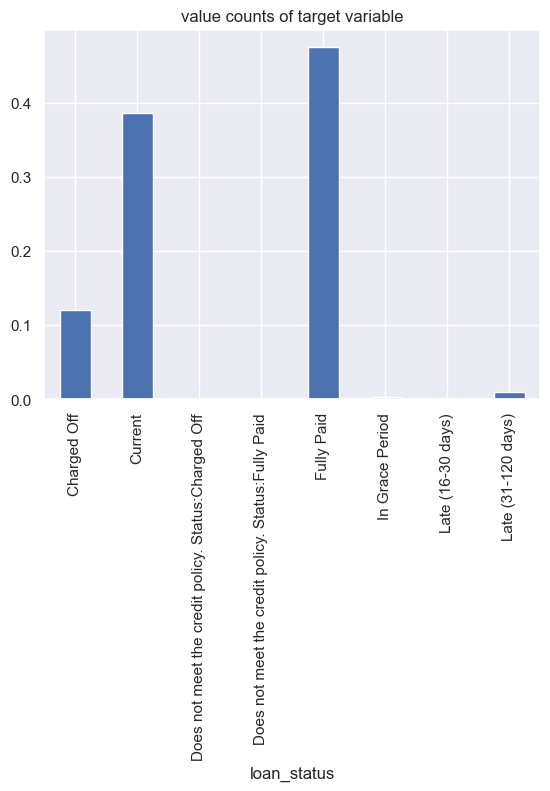

In [733]:
display(df.loan_status.value_counts().to_frame().sort_index())
(df.loan_status.value_counts().sort_index()/len(df)).plot.bar(title='value counts of target variable');

#### **Target Class Remapping to a binary group**

Given our business objective to predict customer defaults, we may need to relabel the target variable for binary classification, assigning 1 to **Default** and 0 to **Not Default**.

**loan_status**  column's labels information:
- **Fully Paid**: The loan has been fully paid off by the borrower. **-> Non-default**
- **Charged Off**: The loan has not been fully repaid, and Lending Club has charged off the remaining balance as a loss. **-> Default**
- **Current**: The loan is currently being repaid on schedule. **-> Non-default**
- **Default**: The borrower has failed to make payments on the loan, and the loan is in default. **-> Default**
- **Late (31-120 days)**: The borrower has missed payments and is between 31 and 120 days late on their payment schedule. **-> Non-default**
- **In Grace Period**: The borrower is in a grace period and has missed a payment. **-> Non-default**
- **Late (16-30 days)**: The borrower has missed a payment and is between 16 and 30 days late on their payment schedule. **-> Non-default**
- **Does not meet the credit policy. Status: Fully Paid**: The loan has been fully paid off, but did not meet Lending Club's credit underwriting policy. **-> Non-default**
- **Does not meet the credit policy. Status: Charged Off**: The loan did not meet Lending Club's credit underwriting policy and has been charged off as a loss. **-> Default**
- **Issued**: The loan has been issued but has not yet been funded by disbursed. **-> Non-default**


In [734]:
print(df.loan_status.isna().sum())


### Converting the target variable a binary classification
df['loan_status_'] = df['loan_status'].map({
    'Charged Off': "Default",
    'Current': "Non-default",
    'Default': "Default",
    'Does not meet the credit policy. Status:Charged Off': "Default",
    'Does not meet the credit policy. Status:Fully Paid': "Non-default",
    'Fully Paid': "Non-default",
    'In Grace Period': "Non-default",
    'Late (16-30 days)' : "Non-default",
    'Late (31-120 days)': "Non-default"
})

print(df.loan_status_.isna().sum())

0
0


#### **Features for Stats**

In [735]:
vis_features = [
    "loan_amnt", "term", "int_rate", "installment", "purpose", "dti", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "last_pymnt_amnt", "grade", "sub_grade","emp_length", "home_ownership", "annual_inc", "verification_status","loan_status_"]

#### **Summary Statistics**

In [736]:
#Summary statistics for numerical columns after removing the unique columns
df[vis_features ].loc[:,"loan_amnt":].describe()

,loan_amnt,int_rate,installment,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,annual_inc
count,22607.00,22607.00,22607.00,22589.00,22607.00,22607.00,22607.00,22607.00,22607.00,22594.00,22607.00,22607.00,22607.00
mean,14987.04,13.09,443.77,18.90,0.31,0.57,11.64,0.20,16597.69,50.43,24.08,3371.38,77641.91
std,9181.45,4.87,266.04,16.18,0.86,0.87,5.66,0.54,24681.71,24.64,11.89,5950.40,70067.13
min,1000.00,5.31,23.01,0.00,0.00,0.00,1.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,9.44,250.59,11.84,0.00,0.00,8.00,0.00,5975.50,31.90,15.00,308.75,46000.00
50%,12800.00,12.62,377.37,17.88,0.00,0.00,11.00,0.00,11410.00,50.40,22.00,595.06,65000.00
75%,20000.00,15.99,584.96,24.53,0.00,1.00,14.00,0.00,20272.00,69.40,31.00,3618.24,92600.00
max,40000.00,30.99,1714.54,999.00,16.00,7.00,57.00,11.00,1470945.00,128.60,104.00,40752.55,4800000.00


#### **Categorical and Numeric Variables**


In [737]:
# Identify categorical features
categorical = [feature for feature in df[vis_features].iloc[:, :-1].columns if df[feature].dtype == 'object']

# Identify numerical features by excluding categorical features
#'home_ownership','verification_status','purpose'
numerical = [feature for feature in df[vis_features].iloc[:, :-1].columns if feature not in categorical]


# Print the results
print("Categorical columns:", categorical)
print("Numerical columns:", numerical)

Categorical columns: ['term', 'purpose', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status']
Numerical columns: ['loan_amnt', 'int_rate', 'installment', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_pymnt_amnt', 'annual_inc']


#### **Missing Values**

Columns with Missing Values:


revol_util      13
dti             18
emp_length    1384
dtype: int64

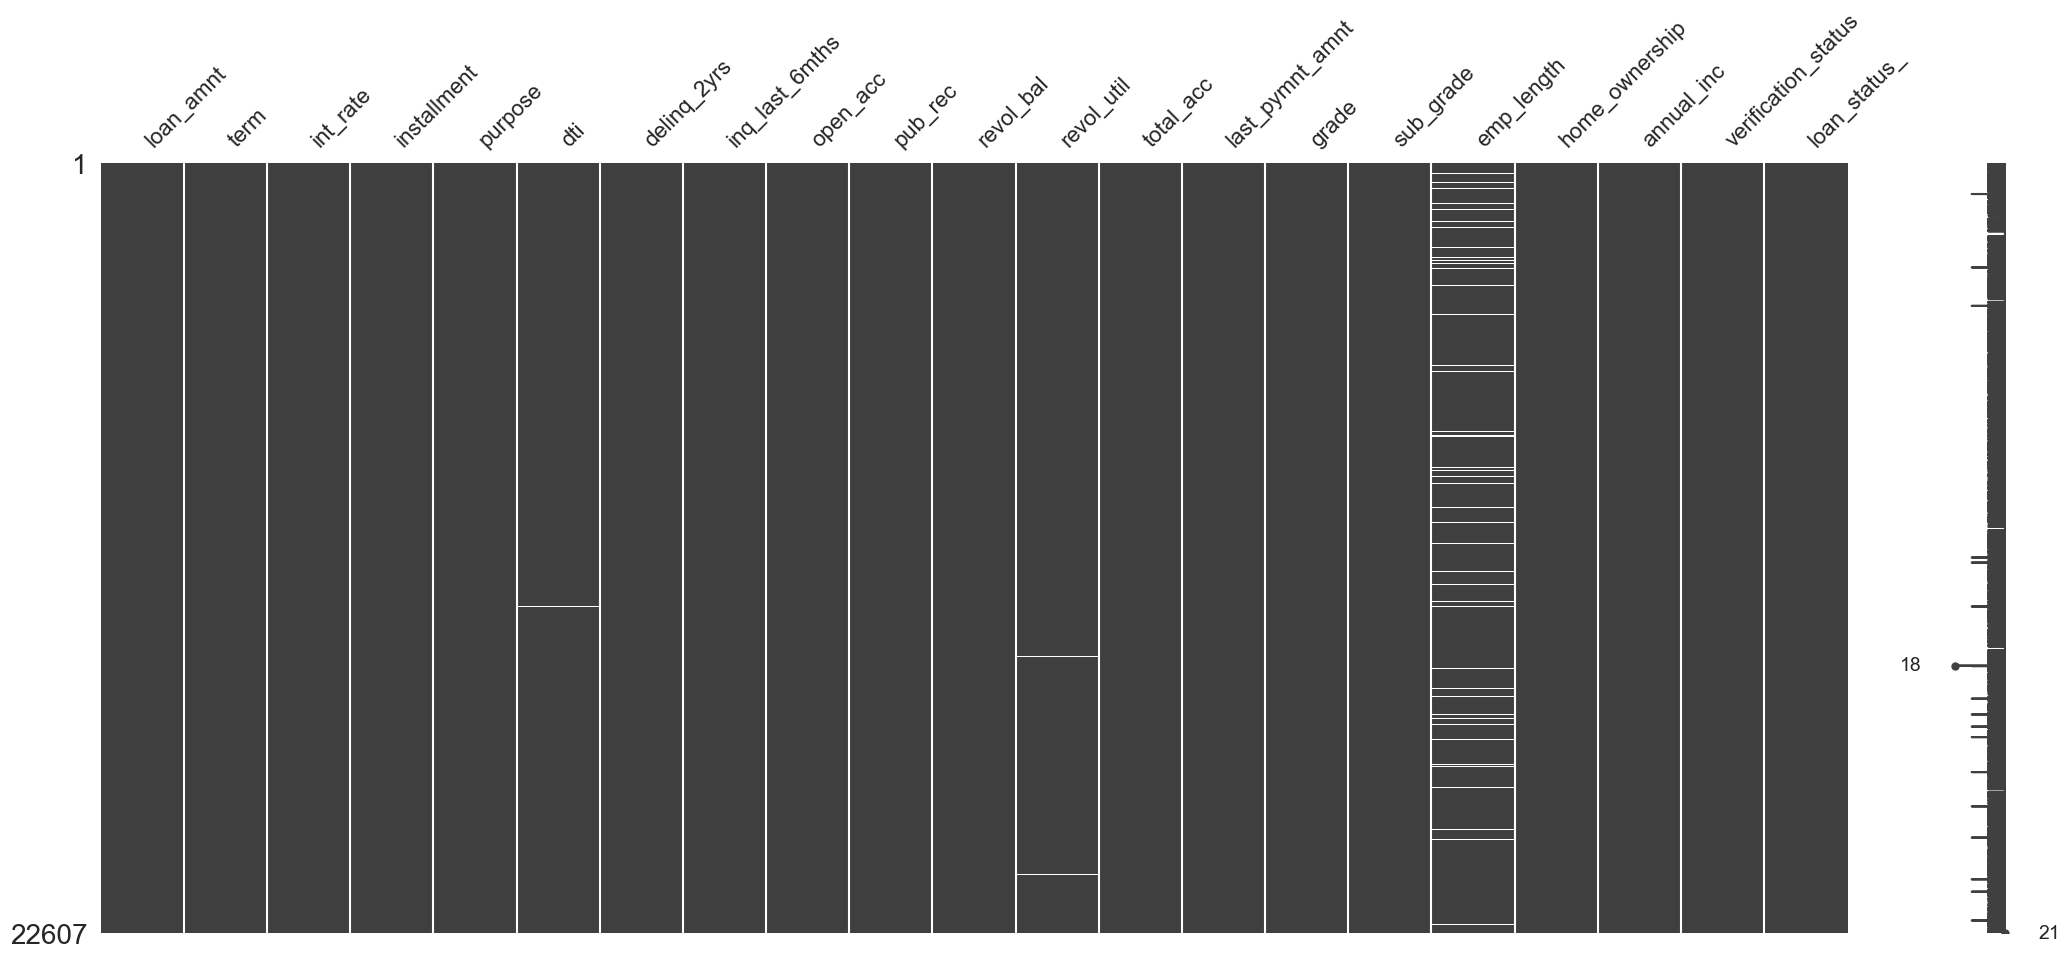

In [738]:
missing_values = df[vis_features].isnull().sum().sort_values()
missing_values = missing_values[missing_values > 0]
print("Columns with Missing Values:")
display(missing_values)
msno.matrix(df[vis_features])
plt.show()



#### **Bar Charts**

Text(0.5, 1.0, 'Loan status count')

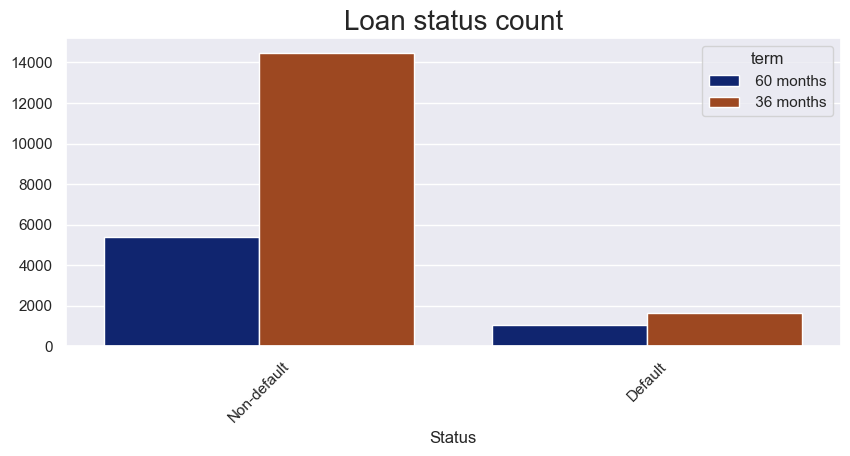

In [739]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df[vis_features],x="loan_status_",hue="term",palette='dark')
ax.set(xlabel='Status', ylabel='')
plt.xticks(rotation=45)
ax.set_title('Loan status count', size=20)

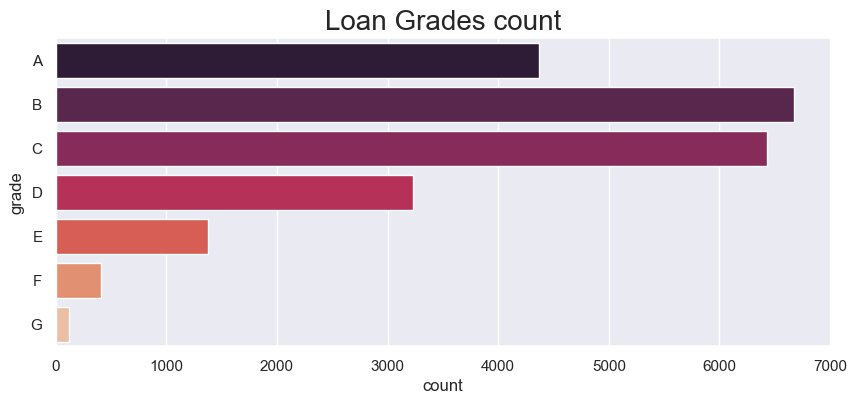

In [740]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,y="grade",order=df['grade'].value_counts().sort_index().index,palette='rocket')
ax.set_title('Loan Grades count', size=20)
plt.show()

Text(0.5, 1.0, 'Loan status count')

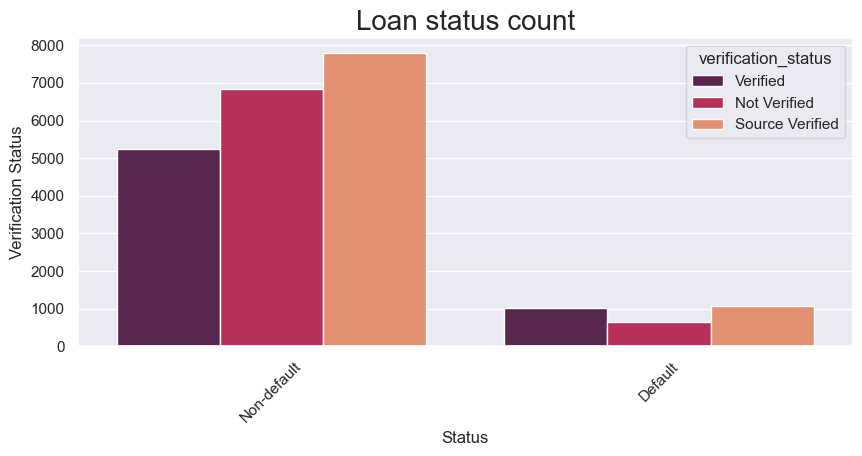

In [741]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="loan_status_",hue="verification_status",palette='rocket')
ax.set(xlabel='Status', ylabel='Verification Status')
plt.xticks(rotation=45)
ax.set_title('Loan status count', size=20)

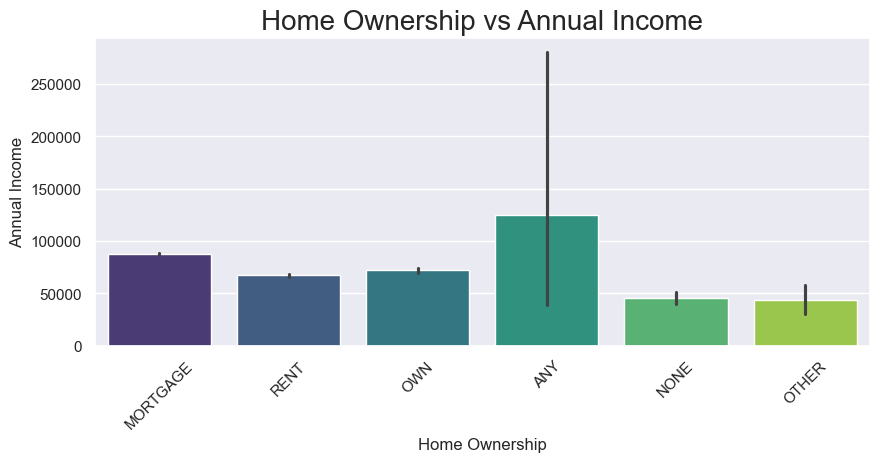

In [742]:
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=df,x="home_ownership",y='annual_inc',palette='viridis')
ax.set(xlabel='Home Ownership', ylabel='Annual Income')
ax.set_title('Home Ownership vs Annual Income', size=20)
plt.xticks(rotation=45)
plt.show()

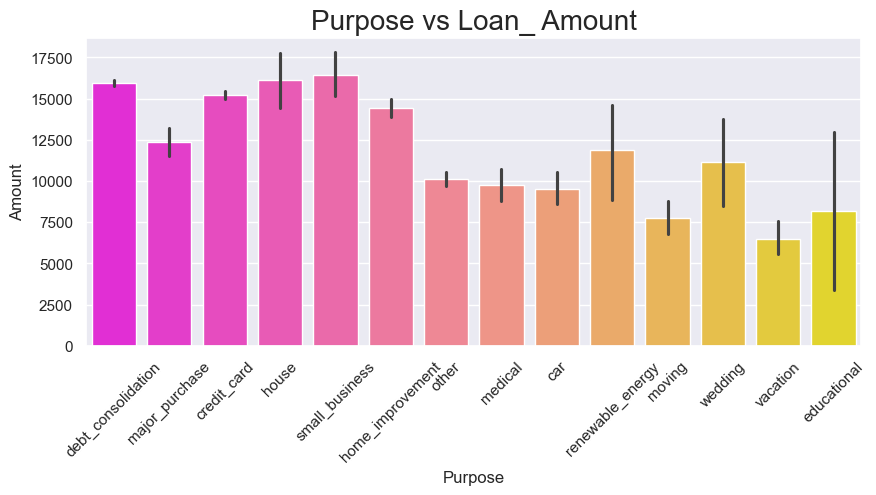

In [743]:
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=df,x="purpose",y='loan_amnt',palette='spring')
ax.set(xlabel='Purpose', ylabel='Amount')
ax.set_title('Purpose vs Loan_ Amount', size=20)
plt.xticks(rotation=45)
plt.show()

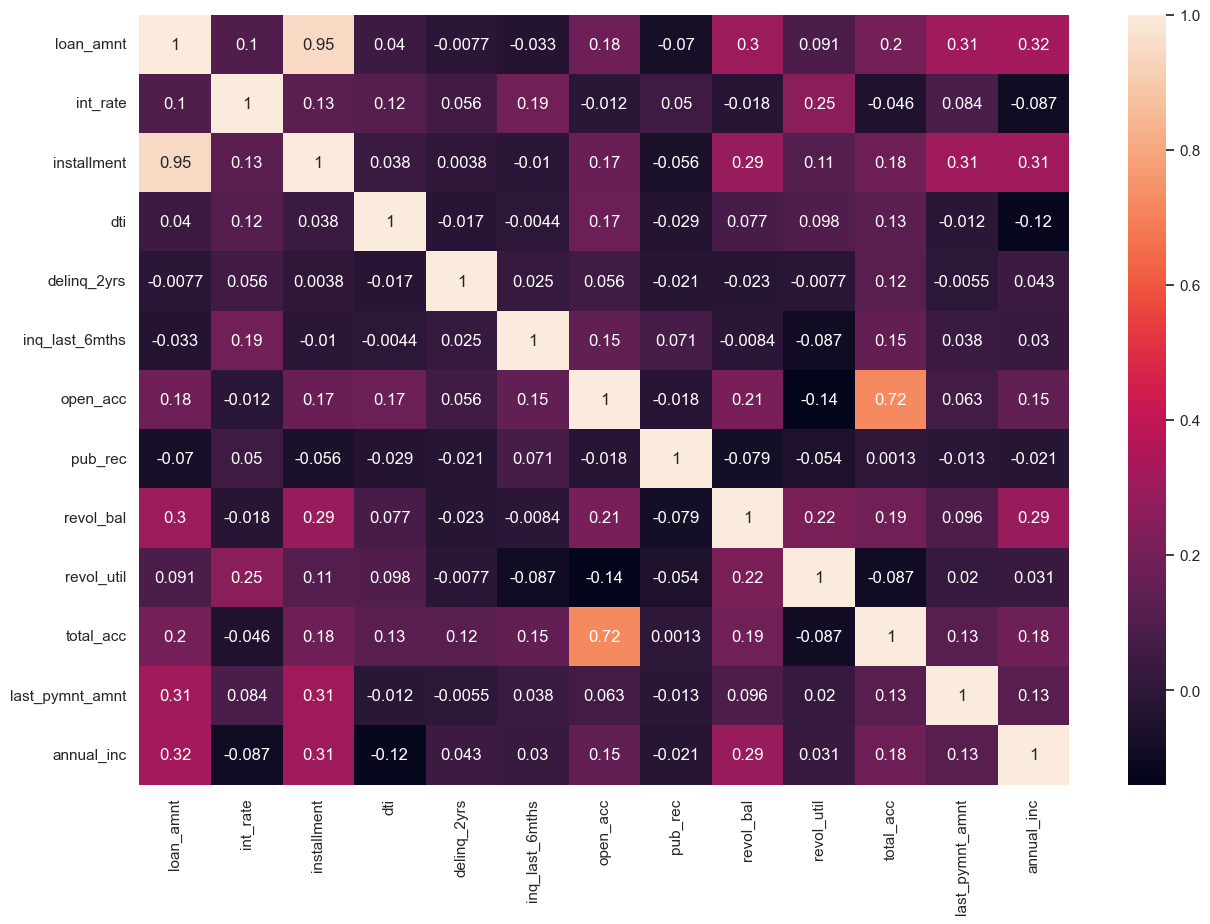

In [744]:
# Plotting a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df[numerical].corr(),annot=True)
plt.show()

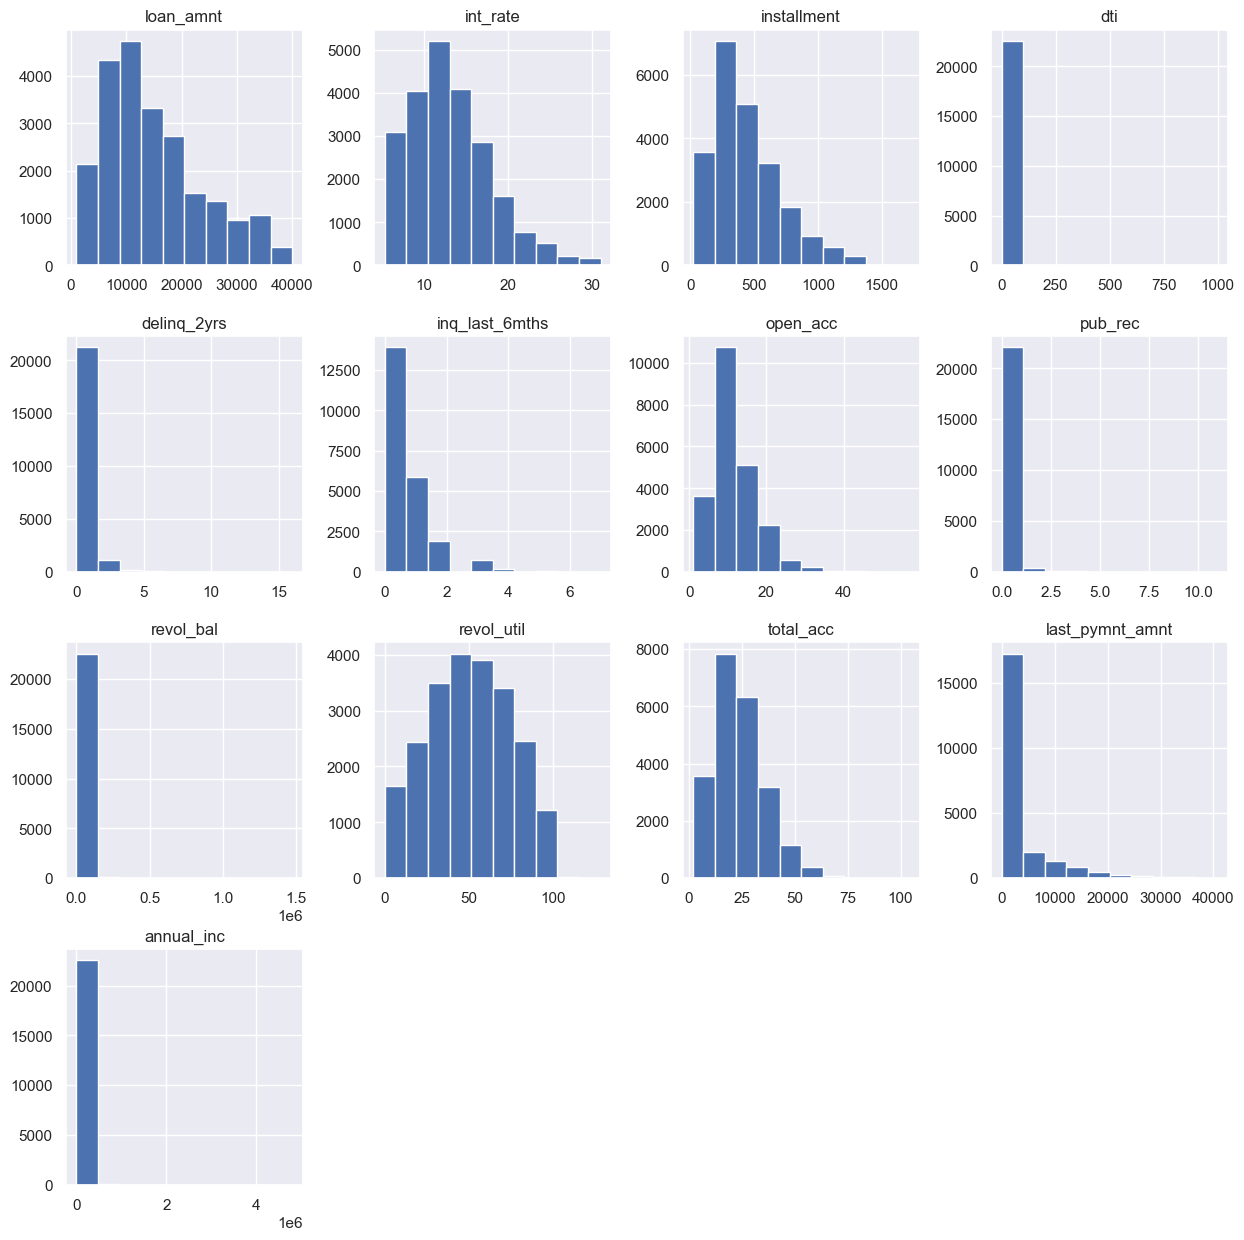

In [745]:
(df[numerical]).hist(figsize=(15,15));

## **Data Preparation (Data Cleaning & Wrangling)**

#### **Handling Features (Data Leakage,Irrelavant and High % of null values)**
- In addition to the above we also applied domain knowledge to identify relevant attributes

In [746]:
# data = df.drop(columns=columns_above_50_pct+irrelevant_features+data_leakage_features)
data = df[vis_features]

#### **Imputing Values**

In [747]:
from sklearn.impute import SimpleImputer

### The first step was to drop records that do not have anything in any of the columns. 
#There are 33 records that don't have any details in the selected features
data = data.dropna(how='all')
display('before imputing',data.isna().sum().to_frame())

#We first had to impute the emp_length feature with the highest count of NaNs (146940), followed by revol_util 1835
imputer_emp_length = SimpleImputer(strategy='most_frequent')
data['emp_length'] = imputer_emp_length.fit_transform(data[['emp_length']]).ravel()


imputer_revol_util = SimpleImputer(strategy='mean')
data['revol_util'] = imputer_revol_util.fit_transform(data[['revol_util']]).ravel()


imputer_dti = SimpleImputer(strategy='mean')
data['dti'] = imputer_dti.fit_transform(data[['dti']]).ravel()


imputer_deling_2yrs = SimpleImputer(strategy='mean')
data['delinq_2yrs'] = imputer_dti.fit_transform(data[['delinq_2yrs']]).ravel()

imputer_inq_last_6mths = SimpleImputer(strategy='mean')
data['inq_last_6mths'] = imputer_dti.fit_transform(data[['inq_last_6mths']]).ravel()

imputer_open_acc = SimpleImputer(strategy='mean')
data['open_acc'] = imputer_dti.fit_transform(data[['open_acc']]).ravel()

imputer_pub_rec = SimpleImputer(strategy='mean')
data['pub_rec'] = imputer_dti.fit_transform(data[['pub_rec']]).ravel()

imputer_total_acc = SimpleImputer(strategy='mean')
data['total_acc'] = imputer_dti.fit_transform(data[['total_acc']]).ravel()

imputer_annual_inc = SimpleImputer(strategy='mean')
data['annual_inc'] = imputer_dti.fit_transform(data[['annual_inc']]).ravel()

display('after imputing',data.isna().sum().to_frame())

'before imputing'

,0
loan_amnt,0
term,0
int_rate,0
installment,0
purpose,0
dti,18
delinq_2yrs,0
inq_last_6mths,0
open_acc,0
pub_rec,0


'after imputing'

,0
loan_amnt,0
term,0
int_rate,0
installment,0
purpose,0
dti,0
delinq_2yrs,0
inq_last_6mths,0
open_acc,0
pub_rec,0


In [748]:
data.loan_status_.unique()

array(['Non-default', 'Default'], dtype=object)

#### **Target Variable Classes**

In [749]:
data['loan_status_']= data['loan_status_'].map({
    'Non-default':'0',
    'Default':'1',
})

# data.loan_status_ = data.loan_status_.astype(int)
data['loan_status_'] = data['loan_status_'].astype(int)
data['loan_status_'].value_counts()

loan_status_
0    19881
1     2726
Name: count, dtype: int64

#### **Encoding categorical ordinal variables**

In [750]:
label_encoder_grade = LabelEncoder()
label_encoder_subgrade = LabelEncoder()
label_encoder_emp_length = LabelEncoder()

data['grade'] = label_encoder_grade.fit_transform(data['grade'])
data['sub_grade'] = label_encoder_subgrade.fit_transform(data['sub_grade'])

emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
data['emp_length']= data['emp_length'].map(emp_length_mapping)

grade_mapping = dict(zip(label_encoder_grade.classes_, label_encoder_grade.transform(label_encoder_grade.classes_)))
subgrade_mapping = dict(zip(label_encoder_subgrade.classes_, label_encoder_subgrade.transform(label_encoder_subgrade.classes_)))


print("\nGrade Mapping:", grade_mapping)
print("Sub_Grade_ Mapping:", subgrade_mapping)
print("Emp_Length_ Mapping:", emp_length_mapping)


Grade Mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
Sub_Grade_ Mapping: {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9, 'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19, 'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29, 'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34}
Emp_Length_ Mapping: {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10}


#### **Encoding categorical nominal variables**

In [751]:
# One hot encoding
data=pd.get_dummies(data=data,columns=['home_ownership','verification_status','purpose'],drop_first=True,dtype=int)
data = data[[col for col in data.columns if col != 'loan_status_'] + ['loan_status_']]


In [752]:
data['loan_status_']

392949     0
1273506    0
324024     0
2066630    0
477199     0
          ..
515100     0
1402694    0
1498114    0
1083024    0
30678      0
Name: loan_status_, Length: 22607, dtype: int32

#### Data wrangling

In [753]:
# Term column
print("Before:",data['term'].unique())
data['term'] = data['term'].map(lambda x: x.lstrip(' ').rstrip(' months'))
print("After:",data['term'].unique())
data['term']= data['term'].astype('int64')

Before: [' 60 months' ' 36 months']
After: ['60' '36']


In [754]:
data.dtypes

loan_amnt                              float64
term                                     int64
int_rate                               float64
installment                            float64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
last_pymnt_amnt                        float64
grade                                    int32
sub_grade                                int32
emp_length                               int64
annual_inc                             float64
home_ownership_MORTGAGE                  int32
home_ownership_NONE                      int32
home_ownership_OTHER                     int32
home_ownership_OWN                       int32
home_ownershi

#### **Split Dataset into Train&Test Sets**

In [755]:
# declare X and Y variables
y = data.loan_status_
X = data.drop(columns=['loan_status_'])


# split dataset into train&test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


#### **Dataset Balancing**

In [756]:
# perform oversampling in the train set
print('Original dataset shape %s' % Counter(y))
print('Train dataset shape %s' % Counter(y_train))
print('Test dataset shape %s' % Counter(y_test))

rus = RandomUnderSampler(random_state=42) # default sampling strategy: resample all classes but the majority class
X_undersampled_train, y_undersampled_train = rus.fit_resample(X_train, y_train)

print('Resampled train dataset shape %s' % Counter(X_undersampled_train))

Original dataset shape Counter({0: 19881, 1: 2726})
Train dataset shape Counter({0: 15904, 1: 2181})
Test dataset shape Counter({0: 3977, 1: 545})
Resampled train dataset shape Counter({'loan_amnt': 1, 'term': 1, 'int_rate': 1, 'installment': 1, 'dti': 1, 'delinq_2yrs': 1, 'inq_last_6mths': 1, 'open_acc': 1, 'pub_rec': 1, 'revol_bal': 1, 'revol_util': 1, 'total_acc': 1, 'last_pymnt_amnt': 1, 'grade': 1, 'sub_grade': 1, 'emp_length': 1, 'annual_inc': 1, 'home_ownership_MORTGAGE': 1, 'home_ownership_NONE': 1, 'home_ownership_OTHER': 1, 'home_ownership_OWN': 1, 'home_ownership_RENT': 1, 'verification_status_Source Verified': 1, 'verification_status_Verified': 1, 'purpose_credit_card': 1, 'purpose_debt_consolidation': 1, 'purpose_educational': 1, 'purpose_home_improvement': 1, 'purpose_house': 1, 'purpose_major_purchase': 1, 'purpose_medical': 1, 'purpose_moving': 1, 'purpose_other': 1, 'purpose_renewable_energy': 1, 'purpose_small_business': 1, 'purpose_vacation': 1, 'purpose_wedding': 1}

## **Modeling - Decision Tree**

In [757]:
# import packages
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

from matplotlib import pyplot

In [758]:
print(y_undersampled_train.value_counts())
y_undersampled_train = y_undersampled_train.astype(int)

print(y_undersampled_train.dtypes)

loan_status_
0    2181
1    2181
Name: count, dtype: int64
int32


In [759]:
print("Unique labels in y:", y_undersampled_train.unique())

Unique labels in y: [0 1]


In [760]:
# Cross Validation
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [7,8,9,10,11,12,13,14,15,16,None], 
                               'min_samples_split':[2,3,4,5,6,7,8],
                               'criterion':['gini', 'entropy'],
                               }],
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=4)

gs_dt.fit(X_undersampled_train,y_undersampled_train)
# Fit DT - Key as ordinal variable
# Collecting results


# Perform nested cross-validation
nested_score_dt = cross_val_score(gs_dt, X=X_undersampled_train, y=y_undersampled_train, cv=outer_cv)

# Gather results for Decision Tree model
model_name = 'Decision Tree'
best_score = gs_dt.best_score_
best_params = str(gs_dt.best_params_)  # Convert to string for full content
best_estimator = str(gs_dt.best_estimator_)  # Convert to string for full content
nested_score_mean = np.mean(nested_score_dt)
nested_score_std = np.std(nested_score_dt)

# Print results directly
print(f"{'Model:':<30} {model_name}")
print(f"{'Non-nested CV F1 Score:':<30} {best_score:.8f}")
print(f"{'Optimal Parameter:':<30} {best_params}")
print(f"{'Optimal Estimator:':<30} {best_estimator}")
print(f"{'Nested CV F1 Score:':<30} {nested_score_mean:.8f}")
print(f"{'Nested CV F1 Score Std:':<30} {nested_score_std:.8f}")

Model:                         Decision Tree
Non-nested CV F1 Score:        0.74292629
Optimal Parameter:             {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 4}
Optimal Estimator:             DecisionTreeClassifier(max_depth=7, min_samples_split=4, random_state=42)
Nested CV F1 Score:            0.74773132
Nested CV F1 Score Std:        0.02033594


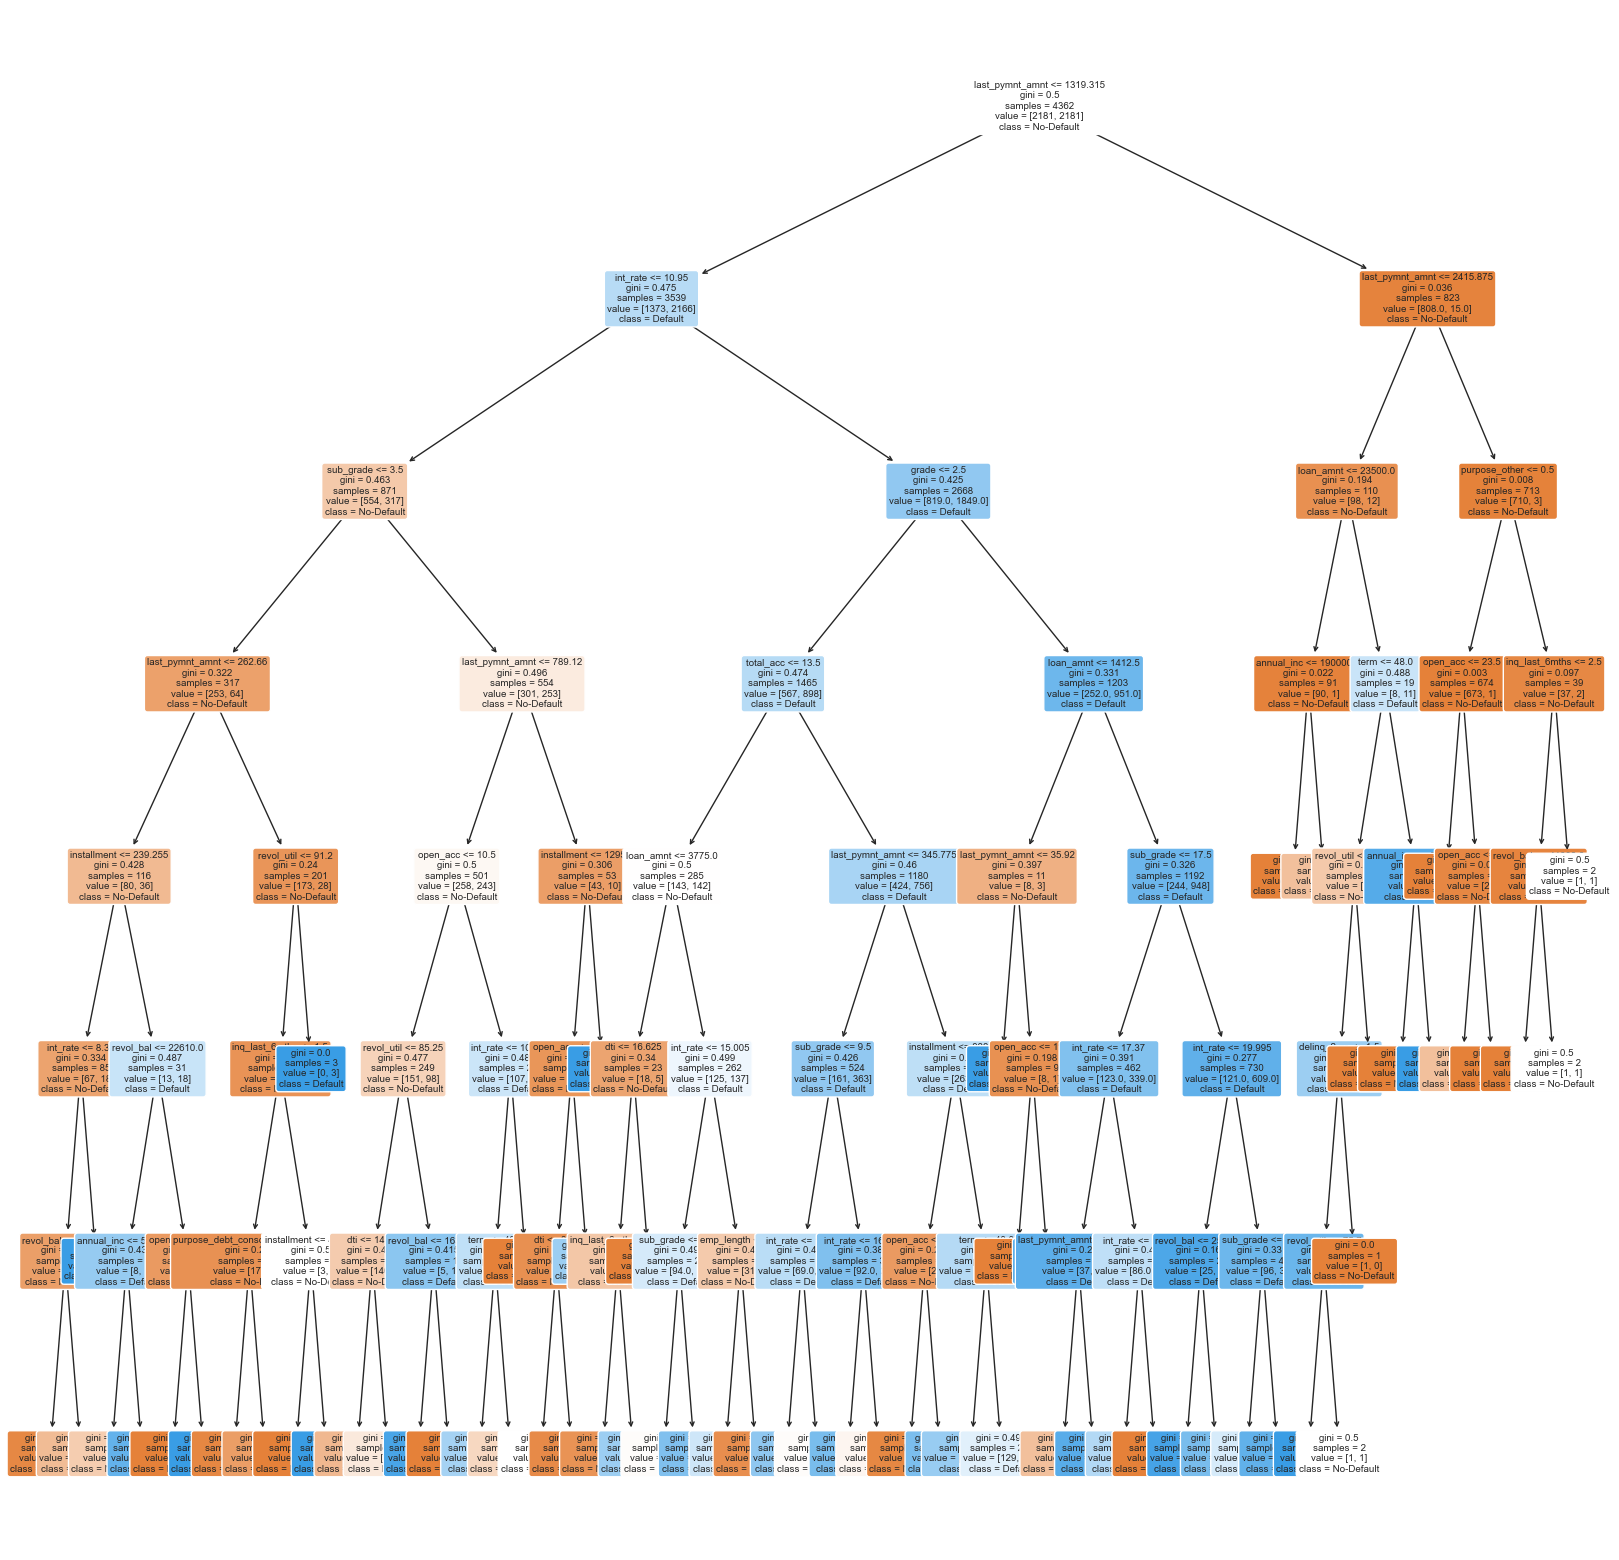

In [761]:
from sklearn import tree

plt.figure(figsize=(20, 20)) 
tree.plot_tree(gs_dt.best_estimator_,feature_names = data.iloc[:, :-1].columns,filled = True,class_names = ['No-Default','Default'],rounded = True, fontsize=7) ;

## **Modeling - kNN**

In [762]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#Normalize Data
pipe = Pipeline([
    (
        'sc', StandardScaler()),
    ('knn', KNeighborsClassifier(p=2,
                                 metric='minkowski'))
])

#Parameters to optimize:  k for number of nearest neighbors AND type of distance

params = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'knn__weights': ['uniform', 'distance']
}

gs_knn2 = GridSearchCV(estimator=pipe,
                       param_grid=params,
                       scoring='f1',
                       cv=inner_cv,
                       n_jobs=4)

gs_knn2 = gs_knn2.fit(X_undersampled_train, y_undersampled_train)
nested_score_gs_knn2 = cross_val_score(gs_knn2, X=X_undersampled_train, y=y_undersampled_train, cv=outer_cv)


# Print results in a clean format
print(f"{'Model:':<30} KNN")
print(f"{'Non-nested CV F1-Score:':<30} {gs_knn2.best_score_:.4f}")
print(f"{'Optimal Parameter:':<30} {gs_knn2.best_params_}")
print(f"{'Optimal Estimator:':<30} {gs_knn2.best_estimator_}")
print(f"{'Nested CV F1-Score:':<30} {nested_score_gs_knn2.mean():.4f}")
print(f"{'Nested CV F1-Score Std:':<30} {nested_score_gs_knn2.std():.4f}")

Model:                         KNN
Non-nested CV F1-Score:        0.6821
Optimal Parameter:             {'knn__n_neighbors': 21, 'knn__weights': 'uniform'}
Optimal Estimator:             Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=21))])
Nested CV F1-Score:            0.6745
Nested CV F1-Score Std:        0.0109


## **Modeling - Logistic Regression**

In [784]:
# import packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model   
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import os

#To ignore the convergence warnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

import math

# Grid Search
# Choosing C parameter for Logistic Regression AND feature selection
# See other parameters here http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state = 42, solver = 'liblinear', multi_class = 'ovr', penalty = 'l1'),
                  param_grid=[{'tol' : [.00001, .0001, .001, .01, .1],
                              'fit_intercept' : [True, False]}],
                  scoring='f1',
                  cv = inner_cv,
                  n_jobs = 4)

lr = gs_lr.fit(X_undersampled_train, y_undersampled_train) 

# Calculate nested cross-validation score
nested_score_lr = cross_val_score(gs_lr, X=X_undersampled_train, y=y_undersampled_train, cv=outer_cv, scoring='f1')
print("Nested CV F-1 Score:", nested_score_lr.mean(), " +/- ", nested_score_lr.std())


# Print Logistic Regression results in a clean format
print(f"{'Model:':<30} Logistic Regression")
print(f"{'Non-nested CV F-1 Score:':<30} {lr.best_score_:.8f}")
print(f"{'Optimal Parameter:':<30} {lr.best_params_}")
print(f"{'Optimal Estimator:':<30} {lr.best_estimator_}")
print(f"{'Nested CV F1 Score:':<30} {np.mean(nested_score_lr):.8f}")
print(f"{'Nested CV F1 Score Std:':<30} {np.std(nested_score_lr):.8f}")

Nested CV F-1 Score: 0.7710382165103866  +/-  0.012878979730618828
Model:                         Logistic Regression
Non-nested CV F-1 Score:       0.77125191
Optimal Parameter:             {'fit_intercept': False, 'tol': 0.001}
Optimal Estimator:             LogisticRegression(fit_intercept=False, multi_class='ovr', penalty='l1',
                   random_state=42, solver='liblinear', tol=0.001)
Nested CV F1 Score:            0.77103822
Nested CV F1 Score Std:        0.01287898


## **Model Evaluation**

In [785]:
import pandas as pd
import numpy as np
import os
from sklearn import neighbors, linear_model,metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, cohen_kappa_score,  confusion_matrix, classification_report, auc,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score,learning_curve, ShuffleSplit, StratifiedKFold, validation_curve, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 

####  **Confusion Matrix**


In [788]:
from sklearn.metrics import confusion_matrix           # confusion_matrix will help us compute confusion matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrices(cm, classes, title_passed):
    """
    This function prints and plots both normalized and non-normalized confusion matrices side by side.
    """
    # Create a 1x2 subplot
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    def plot_confusion_matrix(ax, cm, normalize=False, title=title_passed):
        """
        This function prints and plots a single confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            title = 'Confusion matrix Normalized for ' + title
        else:
            title = 'Confusion matrix, without normalization for ' + title

        print(title)
        print(cm)

        cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        ax.set_title(title)
        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')
        tick_marks = np.arange(len(classes))
        ax.set_xticks(tick_marks)
        ax.set_xticklabels(classes, rotation=45)
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

        # Create and attach colorbar to the axes
        fig.colorbar(cax, ax=ax)

    # Plot non-normalized confusion matrix
    # 
    plot_confusion_matrix(axes[0], cm, normalize=False)

    # Plot normalized confusion matrix
    plot_confusion_matrix(axes[1], cm, normalize=True)

    plt.tight_layout()
    plt.show()

#### **Build Classifiers with Optimal Parameters**

In [789]:
clf_lr = LogisticRegression(fit_intercept=False, multi_class='ovr', penalty='l1',random_state=42, solver='liblinear', tol=0.001)
clf_knn =  Pipeline([
    ('scaler', StandardScaler()),           
    ('knn', KNeighborsClassifier(n_neighbors=21,weights='uniform'))  
])   
clf_dt = DecisionTreeClassifier(max_depth=7, min_samples_split=4,criterion= 'gini', random_state=42) 

In [790]:
# random permutations cross-validation
cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=42)

### **Performance Metrics & Classification Report**

Confusion matrix, without normalization for Linear Regression
[[2698 1279]
 [  92  453]]
Confusion matrix Normalized for Linear Regression
[[0.6784 0.3216]
 [0.1688 0.8312]]


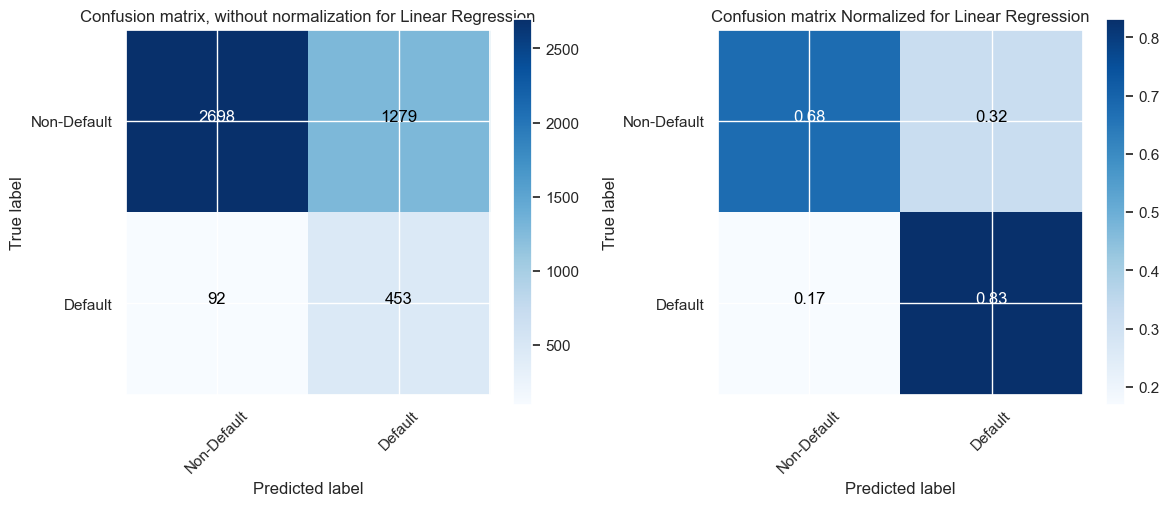

In [791]:
y_pred_lr = clf_lr.fit(X_undersampled_train, y_undersampled_train).predict(X_test)
cnf_matrix_best_model_clf_r = confusion_matrix(y_test, y_pred_lr)
plot_confusion_matrices(cnf_matrix_best_model_clf_r, classes=['Non-Default','Default'],title_passed='Linear Regression')

Confusion matrix, without normalization for KNN
[[2447 1530]
 [ 158  387]]
Confusion matrix Normalized for KNN
[[0.6153 0.3847]
 [0.2899 0.7101]]


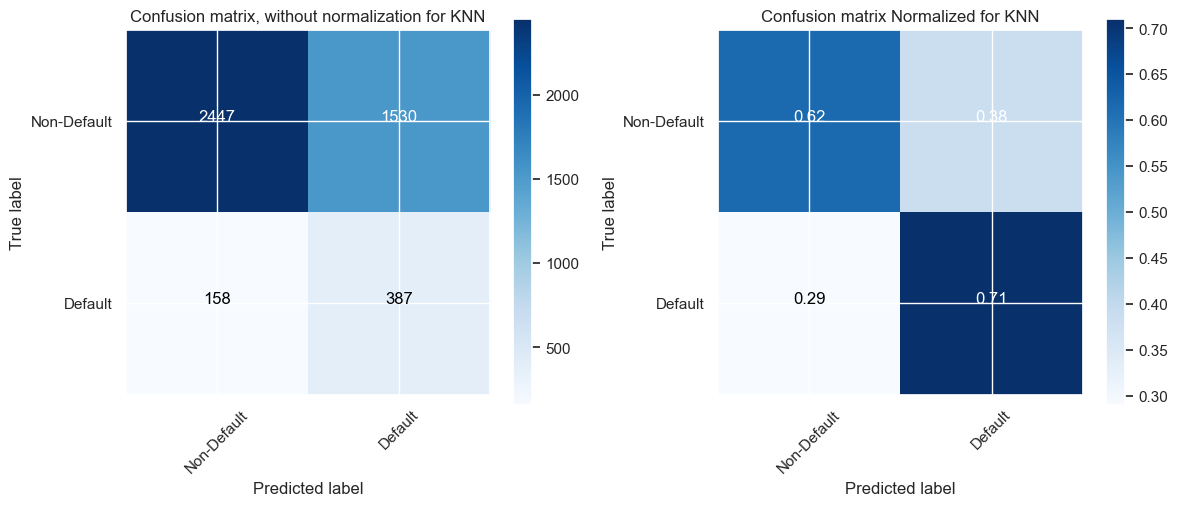

In [769]:
y_pred_knn = clf_knn.fit(X_undersampled_train, y_undersampled_train).predict(X_test)
cnf_matrix_best_model_clf_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrices(cnf_matrix_best_model_clf_knn, classes=['Non-Default','Default'],title_passed='KNN')

Confusion matrix, without normalization for Decision Tree
[[2483 1494]
 [  91  454]]
Confusion matrix Normalized for Decision Tree
[[0.6243 0.3757]
 [0.167  0.833 ]]


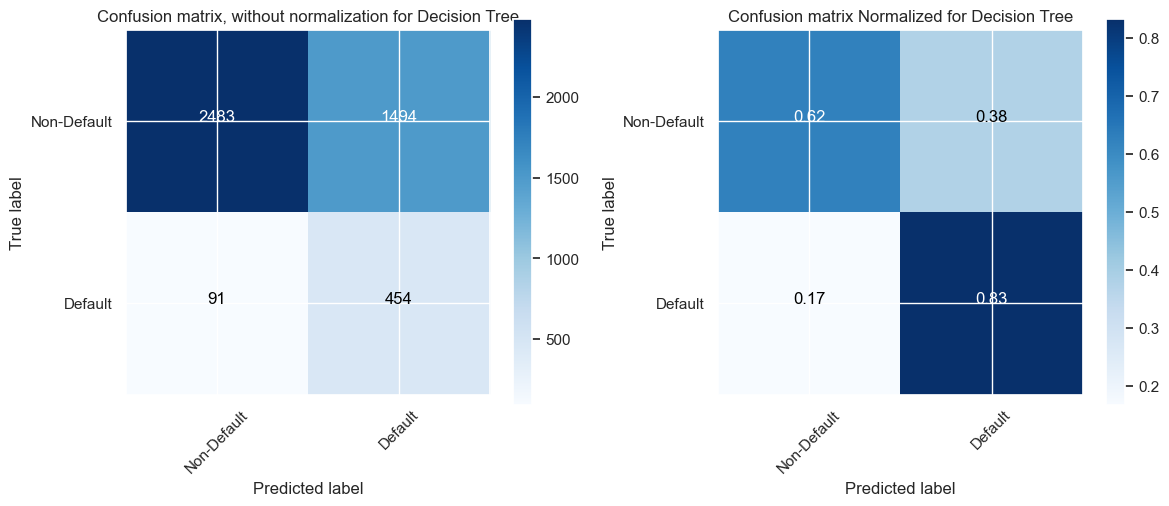

In [793]:
y_pred_dt = clf_dt.fit(X_undersampled_train, y_undersampled_train).predict(X_test)
cnf_matrix_best_model_clf_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrices(cnf_matrix_best_model_clf_dt, classes=['Non-Default','Default'],title_passed='Decision Tree')

#### **Learning Curves**

In [771]:
### Function for Learning Curves 
def plot_learning_curve(estimator, title, X, y, scoring_method, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel(scoring_method)             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, scoring = scoring_method, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,random_state =42)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output

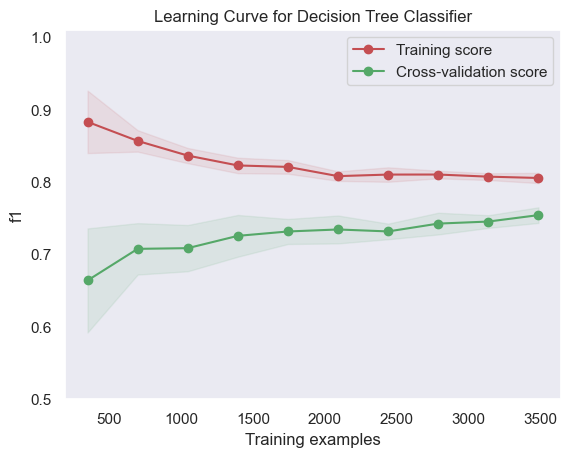

In [772]:
# Learning Curve: Decision Tree Classifier
plot_learning_curve(clf_dt, "Learning Curve for Decision Tree Classifier", X_undersampled_train, y_undersampled_train, 'f1',(0.50, 1.01), cv=cv, n_jobs=4)
plt.show()

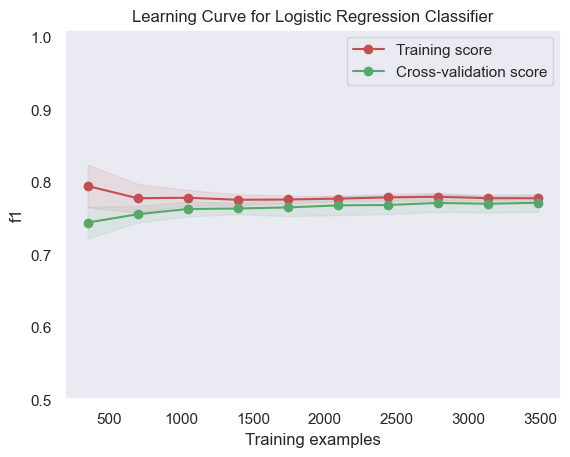

In [773]:
# Learning Curve: Logistic Regression Classifier
plot_learning_curve(clf_lr, "Learning Curve for Logistic Regression Classifier", X_undersampled_train, y_undersampled_train, 'f1',(0.50, 1.01), cv=cv, n_jobs=4)
plt.show()

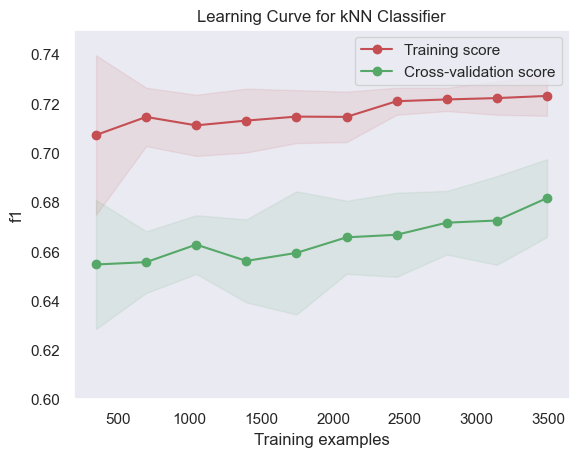

In [774]:
# Learning Curve: kNN Classifier
plot_learning_curve(clf_knn, "Learning Curve for kNN Classifier", X_undersampled_train, y_undersampled_train, 'f1',(0.60, .75), cv=cv, n_jobs=4)
plt.show()

#### **Fitting Graphs**


In [775]:
def plot_fitting_curve(estimator, title, X, y, param_name, param_range, scoring_method, ylim=None, cv=None, n_jobs=1):
    plt.figure() 
    plt.grid()
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Parameter " + param_name) 
    plt.ylabel(scoring_method)
    
    # Compute the validation curve
    train_scores, test_scores = validation_curve(
        estimator=estimator, 
        X=X,
        y=y,
        param_name=param_name if estimator.__class__.__name__ != "Pipeline" else f"{estimator.steps[-1][0]}__{param_name}",
        param_range=param_range,
        cv=cv,
        scoring=scoring_method,
        n_jobs=n_jobs
    )
    
    # Calculate means and standard deviations
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plot training scores
    plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training F1-Score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    
    # Plot validation scores
    plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation F1-Score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
    plt.legend(loc='best')
    plt.tight_layout()
    return plt


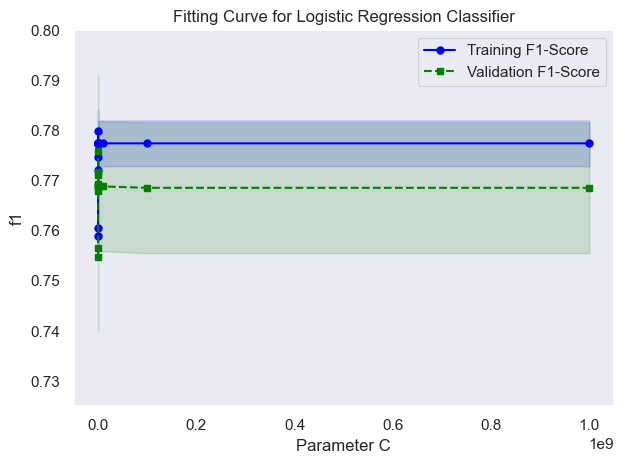

In [776]:
# Fitting Graph: Logistic Regression Classifier
param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
plot_fitting_curve(clf_lr, "Fitting Curve for Logistic Regression Classifier", X_undersampled_train, y_undersampled_train,
                   'C', param_range,'f1', ylim=[0.725,0.8], cv=cv, n_jobs=4)
plt.show()

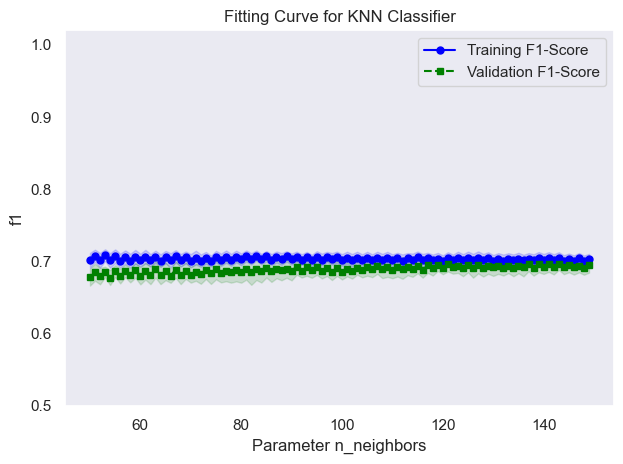

In [794]:
# Fitting Graph: KNN
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(weights='uniform'))
])
param_range = [i for i in range(50,150)]
plot_fitting_curve(pipeline_knn, "Fitting Curve for KNN Classifier", X_undersampled_train, y_undersampled_train,
                   'n_neighbors',param_range,'f1', ylim=[0.5,1.02], cv=cv, n_jobs=4)
plt.show()

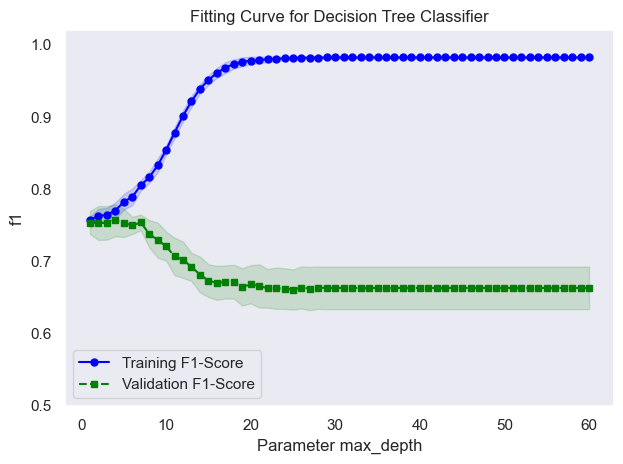

In [778]:
# Fitting Graph: Decision Tree Classifier
param_range = [i for i in range(1,61)]
plot_fitting_curve(clf_dt, "Fitting Curve for Decision Tree Classifier", X_undersampled_train, y_undersampled_train,
                   'max_depth',param_range,'f1', ylim=[0.5,1.02], cv=cv, n_jobs=4)
plt.show()

#### **ROC Curves**

In [779]:
# Function for ROC curves
def plot_ROC_curve(clf, label, clr, ls, X_train, X_test, y_train, y_test):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))
    return plt

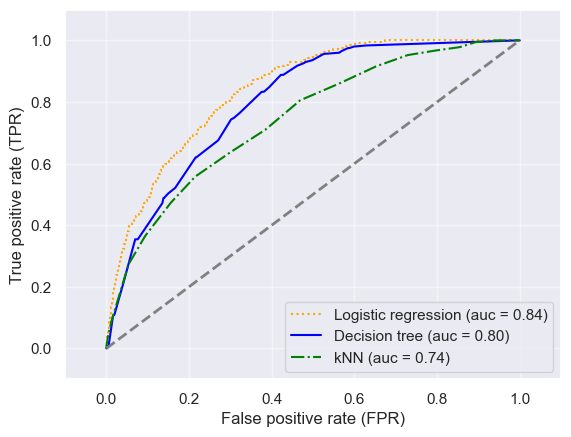

In [780]:
plot_ROC_curve(clf_lr, label='Logistic regression', clr='orange', ls=':', X_train=X_undersampled_train, X_test=X_test, y_train=y_undersampled_train, y_test=y_test)
#DT
plot_ROC_curve(clf_dt, label='Decision tree', clr='blue', ls='-', X_train=X_undersampled_train, X_test=X_test, y_train=y_undersampled_train, y_test=y_test)
#kNN
plot_ROC_curve(clf_knn, label='kNN', clr='green', ls='-.', X_train=X_undersampled_train, X_test=X_test, y_train=y_undersampled_train, y_test=y_test)

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()